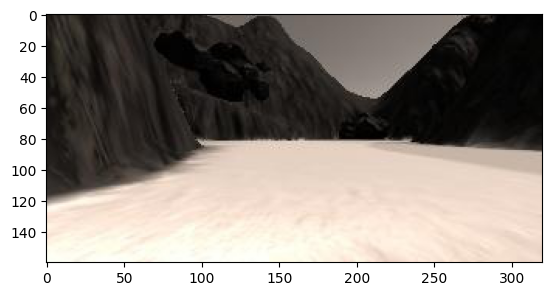

In [3]:
# Import some packages from matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline

# Define the filename, read and plot the image
filename = 'sample.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()


In [4]:
import numpy as np
print(image.dtype, image.shape, np.min(image), np.max(image))

uint8 (160, 320, 3) 0 255


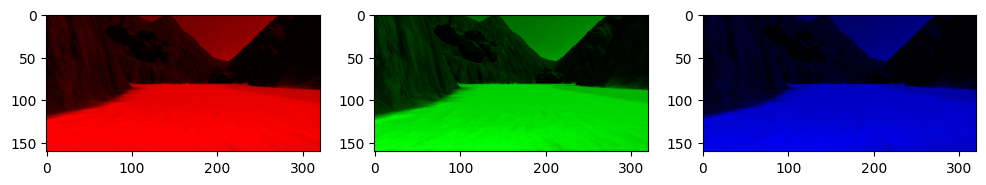

In [5]:
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels
fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show() 


In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
%matplotlib notebook
image = mpimg.imread('example-grid1.jpg')
plt.imshow(image)
plt.show() 

FileNotFoundError: [Errno 2] No such file or directory: 'example-grid1.jpg'

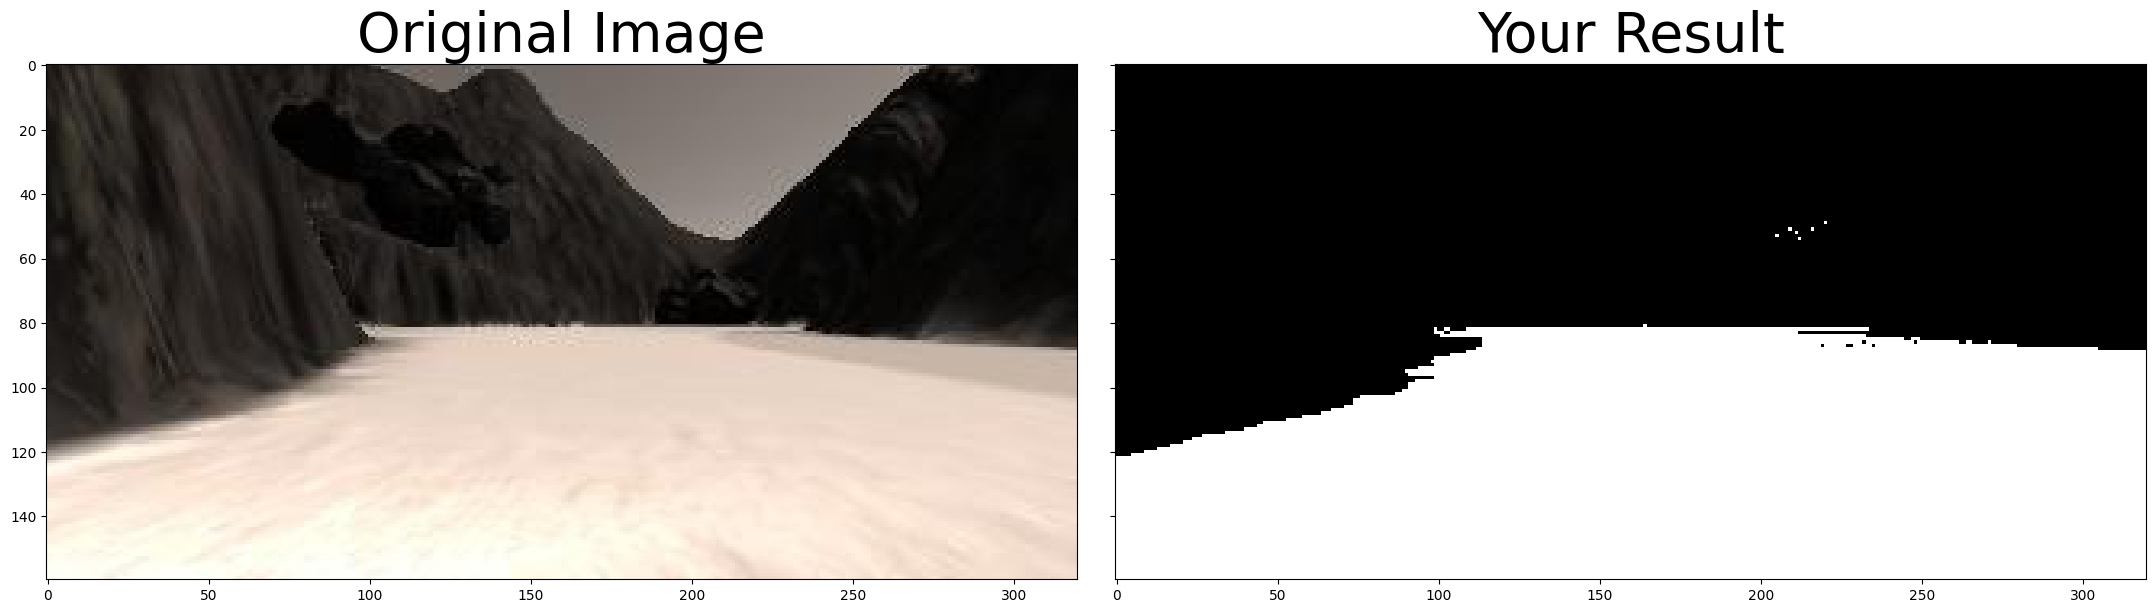

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# Read in the image
# There are six more images available for reading
# called sample1-6.jpg, feel free to experiment with the others!
image_name = 'sample.jpg'
image = mpimg.imread(image_name)

# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() # Uncomment if running on your local machine


In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np


image = mpimg.imread('example-grid1.jpg')
 

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
dst_size = 5 
bottom_offset = 6
source = np.float32([[15 ,140 ], [301 , 140 ], [200 ,96 ], [118 ,96 ]])
destination = np.float32([[image.shape[1]/2-dst_size,image.shape[0]-bottom_offset], 
                 [image.shape[1]/2+dst_size,image.shape[0] - bottom_offset], 
                 [image.shape[1]/2+dst_size,image.shape[0] -2*dst_size - bottom_offset], 
                 [image.shape[1]/2-dst_size,image.shape[0] -2*dst_size - bottom_offset]])      

warped = perspect_transform(image, source, destination)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.show() # Uncomment if running on your local machine 

FileNotFoundError: [Errno 2] No such file or directory: 'example-grid1.jpg'

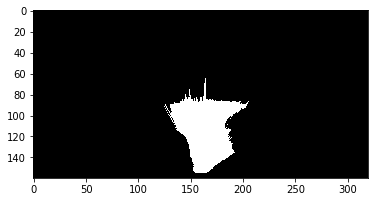

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline
import numpy as np
import cv2
image = mpimg.imread('sample.jpg')
 

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
dst_size = 5 
bottom_offset = 6
source = np.float32([[15 ,140 ], [301 , 140 ], [200 ,96 ], [118 ,96 ]])
destination = np.float32([[image.shape[1]/2-dst_size,image.shape[0]-bottom_offset], 
                 [image.shape[1]/2+dst_size,image.shape[0] - bottom_offset], 
                 [image.shape[1]/2+dst_size,image.shape[0] -2*dst_size - bottom_offset], 
                 [image.shape[1]/2-dst_size,image.shape[0] -2*dst_size - bottom_offset]])      
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    return color_select
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds

warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_thresh=rgb_threshold)
plt.imshow(colorsel, cmap='gray')
plt.show()

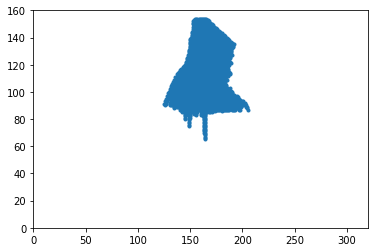

In [7]:
ypos, xpos = colorsel.nonzero()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show()

In [69]:
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel


xpix, ypix = rover_coords(colorsel)
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show() # Uncomment if running on your local machine

NameError: name 'colorsel' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def find_rock(img, yellow_thresh=(100, 100, 20)):
    color_select = np.zeros_like(img[:,:,0])
    rock = (img[:,:,0] > yellow_thresh[0]) & (img[:,:,1] > yellow_thresh[1]) & (img[:,:,2] < yellow_thresh[2])
    color_select[rock] = 1
    return color_select


image = mpimg.imread('example_rock1.jpg')
rock = find_rock(image)
                 
plt.imshow(rock, cmap='gray')    
plt.show()




NameError: name 'mpimg' is not defined

In [1]:
def find_obstacle(img, obs_thresh=(1, 1, 180)):
    color_select = np.zeros_like(img[:,:,0])
    obs = (img[:,:,0] > obs_thresh[0]) & (img[:,:,1] > obs_thresh[1]) & (img[:,:,2] < obs_thresh[2])
    color_select[obs] = 1
    return color_select

image_obstacle = mpimg.imread('sample.jpg')
obstacle = find_obstacle(image)
                 
plt.imshow(obstacle, cmap='gray')    
plt.show()


NameError: name 'mpimg' is not defined